# Redwine - OnderzoeksVraag 2 

Namen - Studentennummer
* Quinn de Groot
* Kaai ter Horst
* Amaryllis Lee  - 1735290

### Casusopdracht
Voor deze casus moeten we een data science pipeline maken, waarbij we dataset redwine.csv analyseert. Het uitgangspunt van de analyse is een aantal onderzoeksvragen. Vervolgens doorloop je het data science proces van CRISP-DM en leg je de resultaten op een reproduceerbare manier vast in Jupyter Notebook.

### Onderzoeksvragen

Er zijn drie onderzoekesvragen beschreven, waar een verplecht is van de opdracht en 2 zelf bedacht zijn.Bovendien zijn er ook de eisen die we zullen toepassen voor elke ondezeoksvraag.

 1.	**In hoeverre is de score van een Portugese Red te voorspellen op basis van de chemische kenmerken?**
    1.	Toepassing van een supervised machine learning 
    2.	Correlatieonderzoek
    
2.	**Kunnen we verschillende groepen vinden van de wijnen met een hoge score op base van de chemische samenstelling?**
    1.	Toepassing van een unsupervised machine learning
    2.	Gebruik van externe dataset
    
3.	**Wat is het verband tusen de ingredienten van de wijnen en de regio's?**
    1.	Interactieve visualisatie
    2.	Toepassing van supervised learning.


## Inhoud

1. Data Understanding
    - Data Collection 
    - Data exploration & analysis
2. Data Preparation
    - Data munging
    - Data cleaning
3. Data Analyses
4. Model Implementeren 


## Data Understanding 

### Data Collection 
In de Data Collection zullen de libraries gaan importeren, de toegewezen datasets en de externe dataset gaan inlezen  en bekijken.

#### Libraries importeren 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

%matplotlib inline

#### Datasets inlezen en verkennen 

In [2]:
# load dataset redwine.csv
df = pd.read_csv('redwine.csv',encoding  = "cp1252", delimiter = ';')
# De eerste 5 rijen bekijken van df
df.head(5)

,id,country,description,designation,points,price,province,taster_name,title,variety,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin O’Keefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,...,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,...,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,4,Portugal,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,5,Portugal,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Portuguese Red,...,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4


### Data exploration

Er zal in redwine.csv ( **df** ) de *features* word bekeken.Er wordt gezien of de *features* in de dataset compleet is.Verder wordt er een analyse gedaan, zodat we inzicht kan krijgen in de dataset. 

Eerst gaan we kijken naar de dimensies van de dataset en naar de datatypes van features in de dataset. We kunnen hiervan uithalen hoeveel rijen en kolommen in onze dataset zijn. Bovendien kunnen we bekijken of er missende waardes zit in de features en de datatypes klopten. 

In [3]:
df.shape  # de dimensies van de dataset 

(2465, 22)

In [4]:
# lijst van de features/kolommen in de dataset
df.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'taster_name', 'title', 'variety', 'winery',
       'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [5]:
# De datypes voor elke feature
df.dtypes

id                        int64
country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
variety                  object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid              object
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                  object
pH                      float64
sulphates               float64
alcohol                  object
dtype: object

We kunnnen van de bovenstaande code de datatypes en de meetniveaus van elke feature in de dataset uithalen. We kunnen elke features bepalen of ze numerieke of string waardes zijn.


- Numerieke features:  
    - id
    - points 
    - price
    - fixed_acidity
    - volatile acidity
    - residual sugar
    - chlorides
    - free sulfur dioxide
    - total sulfur dioxide
    - pH 
    - sulphates
    - alcohol
- Categorical Features
    - country                  # moet verwijdert worden, alle waarden = Portugal
    - description              
    - designation               
    - province                 
    - taster_name              
    - title                    
    - variety                  # moet verwijderd worden
    - winery                   
    
  

Als we de de waardes bekijken van de features in de dataset, zien we verkeerde datatypes, onnodige kolommen en verkeerde string representation in de dataset. Als we de feature citric acid bekijk, zien we dat er ' - ' voorkomt die aangepast moet worden.

In [6]:
df['citric acid'].head(10)

0      0.4
1     0.37
2     0.07
3     0.07
4     0.34
5     0.42
6     0.43
7     -   
8     0.41
9     0.07
Name: citric acid, dtype: object

De onderstaande features die de datatype object heeft, moeten een float zijn.
We gaat de datatypes van deze features veranderen met pd.to_numeric( *feature* , errors = 'coerce').

errors = 'coerce' : zet om alle invalid parsing naar NaN waarde.

* citric acid              object - float!
* density                  object - float!
* alcohol                  object - float!

In [7]:
# de datatypes van de nodige features veranderen 
# we gebruiken errors = 'coerce' om alle invalid parsing naar NaN te zetten.
df['citric acid'] = pd.to_numeric(df['citric acid'], errors = 'coerce')
df['density']     = pd.to_numeric(df['density'], errors = 'coerce')
df['alcohol']     = pd.to_numeric(df['alcohol'], errors = 'coerce')

In [8]:
df.dtypes

id                        int64
country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
variety                  object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

Wij zien dat de features *variety* en *country* zijn onnodig,  want zij hebben 1 soort waarde namelijk Partoguese Red en Portugal. We kunnen dus zeggen dat alle wijnen in de dataset zijn Portuguese Red en alle wijnen komen uit Portugal.

In [9]:
print(df['variety'].unique()) 
print(df['country'].unique()) 

['Portuguese Red']
['Portugal']


#### Missend waardes
Er wordt bekeken of er missend waardes zijn in de kolommen.

In [10]:
df.isnull().sum()

id                        0
country                   0
description               0
designation             153
points                    0
price                   269
province                  0
taster_name               0
title                     0
variety                   0
winery                    0
fixed acidity             0
volatile acidity          0
citric acid             203
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   1
pH                        0
sulphates                 0
alcohol                  10
dtype: int64

Aan de hand van de data exploration, kunnen we de volgende kolommen verwijderen:
* country : Deze kolom bevat alleen de waarde Portugal, we kunnen concluderen dat alle wijen komt van Portugal
* variety : Deze kolom bevat alleen de waarde Portuguese Red
* designation  en price: Deze kolommen zullen we niet gaan gebruiken om onze onderzoeksvragen op te lossen en ze  bevatten veel NaN waarden. 

In [11]:
#kolommen verwijderen 
df = df.drop(['country'], axis = 1)
df = df.drop(['variety'], axis = 1)
df = df.drop(['designation'], axis = 1)
df = df.drop(['price'], axis = 1)

# Onderzoeksvraag 2: Ama

**Kunnen we verschillende groepen vinden van de wijnen met een hoge score op base van de chemische samenstelling?**
* Toepassing van een unsupervised machine learning
* Gebruik van externe dataset

Er zal voor deze onderzoeksvraag gebruik maken van clustering en de model k means.

**Aanpak:**
1. Externe dataset loaden bekijken
2. boxplot voor elke chemische samenstelling
3. Normaliseren 
4. Model bouwen 

### Data  analysis
*In deze sectie word een analyse uitgevoerd op de dataset en de externe dataset voor onderzoeksvraag 2.

We zal eerst de dimensies en de data bekijken van de dataset redwine.

In [12]:
df.shape # Dimensies van de redwine dataset.

(2465, 18)

In [13]:
df.head() # dataset redwine even bekijken

,id,description,points,province,taster_name,title,winery,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,"This is ripe and fruity, a wine that is smooth...",87,Douro,Kerin O’Keefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Quinta dos Avidagos,10.0,0.29,0.40,2.9,0.098,10.0,26.0,10.00600,3.48,0.91,9.7
1,2,"From an estate in the south of the Alentejo, t...",91,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Casa Santa Vitória,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6
2,3,A year in wood and 30 months in bottle before ...,90,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Adega Cooperativa de Borba,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,4,Wood aging gives this ripe blend of Baga and T...,90,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Quinta de Foz de Arouce,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,5,"A powerful wine, richly structured and full of...",92,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Herdade Grande,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.99360,3.28,0.66,12.4


Vervolgens gaan we de externe dataset loaden verkennen.  <br>
De externe dataset geeft aan de chemische samenstelling van witte varianten van de Portuguese "Vinho Verde" wijn.

In [14]:
#load externe dataset.
whiteWine = pd.read_csv('winequality-white.csv', delimiter = ';')
whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
whiteWine.shape # er zijn 4898 rijen en 12 kolommen 

(4898, 12)

In [16]:
whiteWine.describe(include = 'all') # attributen bekijken van whiteWine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [17]:
whiteWine.isnull().sum() # er zijn geen missende waardes 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
whiteWine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Er zijn 4898 rijen en 12 kolommen in de dataset whiteWine.  <br>
Bovendien is de dataset schoon , want de datatypes klopten en de features bevatten geen missende waardes.

Aan de hand van de boxplotten zie we dat de waardes van de feautures zeer divers zijn en voor problemen kunnen zorgen wanneer we gaan weken met afstandsmaten.

In [19]:
whiteWine['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [20]:
# verandert column name quality naar qualityscore om het makkelere te maken met het mergen van de twee datasets
whiteWine = whiteWine.rename(columns = {'quality':'qualityscore'})
whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityscore
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Normaliseren** 

We gaan daarom de features normaliseren door middel van de z-score.
Z-score betkent dat we van een bepaalde normaalverdeling naar een standaard normaalverdeling gaat, waar de gemiddelde gelijk aan 0 is en de standaarddeviatie gelijk aan 1 is.

De z-score kunnen we berekenen:
𝑧𝑖= 𝑥𝑖− μ / 𝜎

    zi = z score
    x = waarde van kolom x
    μ = gemiddelde waarde van kolom x
    𝜎 = standaarddeviatie van kolom x

In [21]:
# whiteWine normaliseren 
whitenorm = pd.DataFrame()
for col in list(whiteWine.columns):
    whitenorm[col] = (whiteWine[col]-whiteWine[col].mean())/whiteWine[col].std()
whitenorm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityscore
0,0.172079,-0.081762,0.213258,2.821061,-0.035351,0.569873,0.744489,2.331274,-1.246794,-0.349149,-1.393010,0.137856
1,-0.657434,0.215874,0.047996,-0.944669,0.147732,-1.252891,-0.149669,-0.009153,0.739953,0.001342,-0.824192,0.137856
2,1.475600,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.973236,0.358628,0.475053,-0.436771,-0.336633,0.137856
3,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0.137856
4,0.409083,-0.478608,-0.117266,0.415726,0.559670,0.687471,1.120977,0.525802,0.011479,-0.787262,-0.499152,0.137856


Bepaal wat de feature variabelen 
Doordat er wordt gebruik maken va unsupervised learning , dan weten dat er geen target variabel is.

In [22]:
#Voor deze dataset zullen we gaan kijken naar de chemische samenstelling van de wijnen 
redfeat = df.loc[:, 'fixed acidity':]
redfeat['qualityscore'] = df['points']
redfeat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityscore
0,10.0,0.29,0.40,2.9,0.098,10.0,26.0,10.00600,3.48,0.91,9.7,87
1,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,91
2,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,90
3,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,90
4,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.99360,3.28,0.66,12.4,92


In [23]:
redfeat.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
qualityscore              int64
dtype: object

In [24]:
# redWine dataset normaliseren 
rednorm = pd.DataFrame()
for col in list(redfeat.columns):
    rednorm[col] = (redfeat[col]-redfeat[col].mean())/redfeat[col].std()
rednorm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityscore
0,0.949468,-1.331489,0.542608,0.239972,0.223513,-0.559258,-0.639351,0.827454,1.096616,1.446967,-0.678378,-0.609065
1,-0.030446,-1.499210,0.380756,-0.826104,-0.244140,-0.751951,-0.729745,-0.126196,-0.332630,0.229796,-0.773452,0.735925
2,-0.779792,0.904783,-1.237767,-0.044315,0.074714,-0.077527,-0.790008,-0.126374,0.446959,-0.349809,0.842812,0.399678
3,-0.779792,0.904783,-1.237767,-0.044315,0.074714,-0.077527,-0.790008,-0.126374,0.446959,-0.349809,0.842812,0.399678
4,-0.203372,-0.269260,0.218904,-0.257530,-0.307911,0.018820,-0.669482,-0.126599,-0.202698,-0.002046,1.888630,1.072172


**Aan de hand van de bovenstaande output zien we dat de benodigde features (de chemische samenstellingen) zijn continue waardes.**

In [25]:
# Datasets samenvoegen
feat = pd.concat([rednorm, whitenorm], ignore_index =True)
feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityscore
0,0.949468,-1.331489,0.542608,0.239972,0.223513,-0.559258,-0.639351,0.827454,1.096616,1.446967,-0.678378,-0.609065
1,-0.030446,-1.499210,0.380756,-0.826104,-0.244140,-0.751951,-0.729745,-0.126196,-0.332630,0.229796,-0.773452,0.735925
2,-0.779792,0.904783,-1.237767,-0.044315,0.074714,-0.077527,-0.790008,-0.126374,0.446959,-0.349809,0.842812,0.399678
3,-0.779792,0.904783,-1.237767,-0.044315,0.074714,-0.077527,-0.790008,-0.126374,0.446959,-0.349809,0.842812,0.399678
4,-0.203372,-0.269260,0.218904,-0.257530,-0.307911,0.018820,-0.669482,-0.126599,-0.202698,-0.002046,1.888630,1.072172


In [26]:
feat.shape

(7363, 12)

Boxplot tekenen van alle chemische samenstelling

Boxplotten tekenen van de chemische samenstellingen van de wijnen met een hoge score. 
Wijnen met hoge score beschouw ewe als de wijnen die een qualityscore boven  de gemiddelde.

In [27]:
qualityscore_gem = feat['qualityscore'].mean()
hogescore = feat[feat['qualityscore'] >qualityscore_gem]
len(hogescore) 

4475

In [28]:
hogescore.isnull().sum()


fixed acidity            0
volatile acidity         0
citric acid             93
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  1
pH                       0
sulphates                0
alcohol                  5
qualityscore             0
dtype: int64

In [29]:
hogescore = hogescore.fillna(0) # verandert alle NaN waardes naar 0

In [30]:
hogescore.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityscore
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000
mean,-0.037271,-0.198172,0.036935,-0.051375,-0.125672,-0.018880,-0.155149,-0.152200,0.052295,0.080328,0.331097,0.647252
std,0.993635,0.898916,0.925227,0.985668,0.823798,0.907034,0.891282,0.939363,1.011362,1.022135,1.023553,0.657171
min,-3.619982,-2.281905,-2.761461,-1.181463,-1.604586,-1.899678,-2.832144,-2.312802,-3.101091,-2.364468,-1.636790,0.063430
25%,-0.722150,-0.851892,-0.530422,-0.826104,-0.499224,-0.664902,-0.790008,-0.744716,-0.650770,-0.612016,-0.499152,0.137856
50%,-0.145730,-0.280185,-0.117266,-0.294045,-0.222883,-0.135713,-0.307904,-0.126426,0.011479,-0.060006,0.313446,0.137856
75%,0.527585,0.315085,0.488658,0.336862,0.056190,0.511075,0.385121,0.191455,0.673728,0.614700,1.128035,1.266985
max,8.704217,6.813453,10.955302,11.712916,9.576526,5.414217,7.285241,15.029763,4.539801,7.474859,3.409820,3.762152


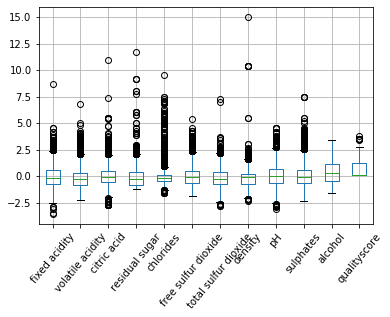

In [31]:
hogescore.boxplot(rot = 50)

In [32]:
hogescore.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityscore
fixed acidity,1.000000,-0.138978,0.400865,0.124804,0.076029,-0.057445,0.062856,0.269343,-0.505045,0.040821,-0.139906,-0.017556
volatile acidity,-0.138978,1.000000,-0.256278,0.056545,-0.024539,-0.067016,0.052871,-0.061330,0.080326,-0.081598,0.143809,-0.026904
citric acid,0.400865,-0.256278,1.000000,0.066042,0.150876,0.004695,0.053408,0.109539,-0.228977,0.104860,-0.000987,0.019732
residual sugar,0.124804,0.056545,0.066042,1.000000,0.095989,0.218926,0.335659,0.734932,-0.188975,-0.054865,-0.328244,-0.053990
chlorides,0.076029,-0.024539,0.150876,0.095989,1.000000,0.084704,0.145583,0.248406,-0.119497,0.052760,-0.345626,-0.151796
free sulfur dioxide,-0.057445,-0.067016,0.004695,0.218926,0.084704,1.000000,0.603197,0.247599,0.039137,0.046580,-0.201136,-0.038472
total sulfur dioxide,0.062856,0.052871,0.053408,0.335659,0.145583,0.603197,1.000000,0.435843,0.008072,0.079334,-0.366188,-0.130263
density,0.269343,-0.061330,0.109539,0.734932,0.248406,0.247599,0.435843,1.000000,-0.092589,0.060616,-0.626598,-0.173226
pH,-0.505045,0.080326,-0.228977,-0.188975,-0.119497,0.039137,0.008072,-0.092589,1.000000,0.081241,0.120132,0.044484
sulphates,0.040821,-0.081598,0.104860,-0.054865,0.052760,0.046580,0.079334,0.060616,0.081241,1.000000,-0.019353,0.053029


Uit de bovenstaande grafiek kunnen we de volgende features nemen voor onze model:
    1. citric acid
    2. residual sugar
    3. density
    4. pH
    5. alcohol 

In [33]:
#ogescore = hogescore[['citric acid', 'residual sugar', 'density', 'pH', 'alcohol']]

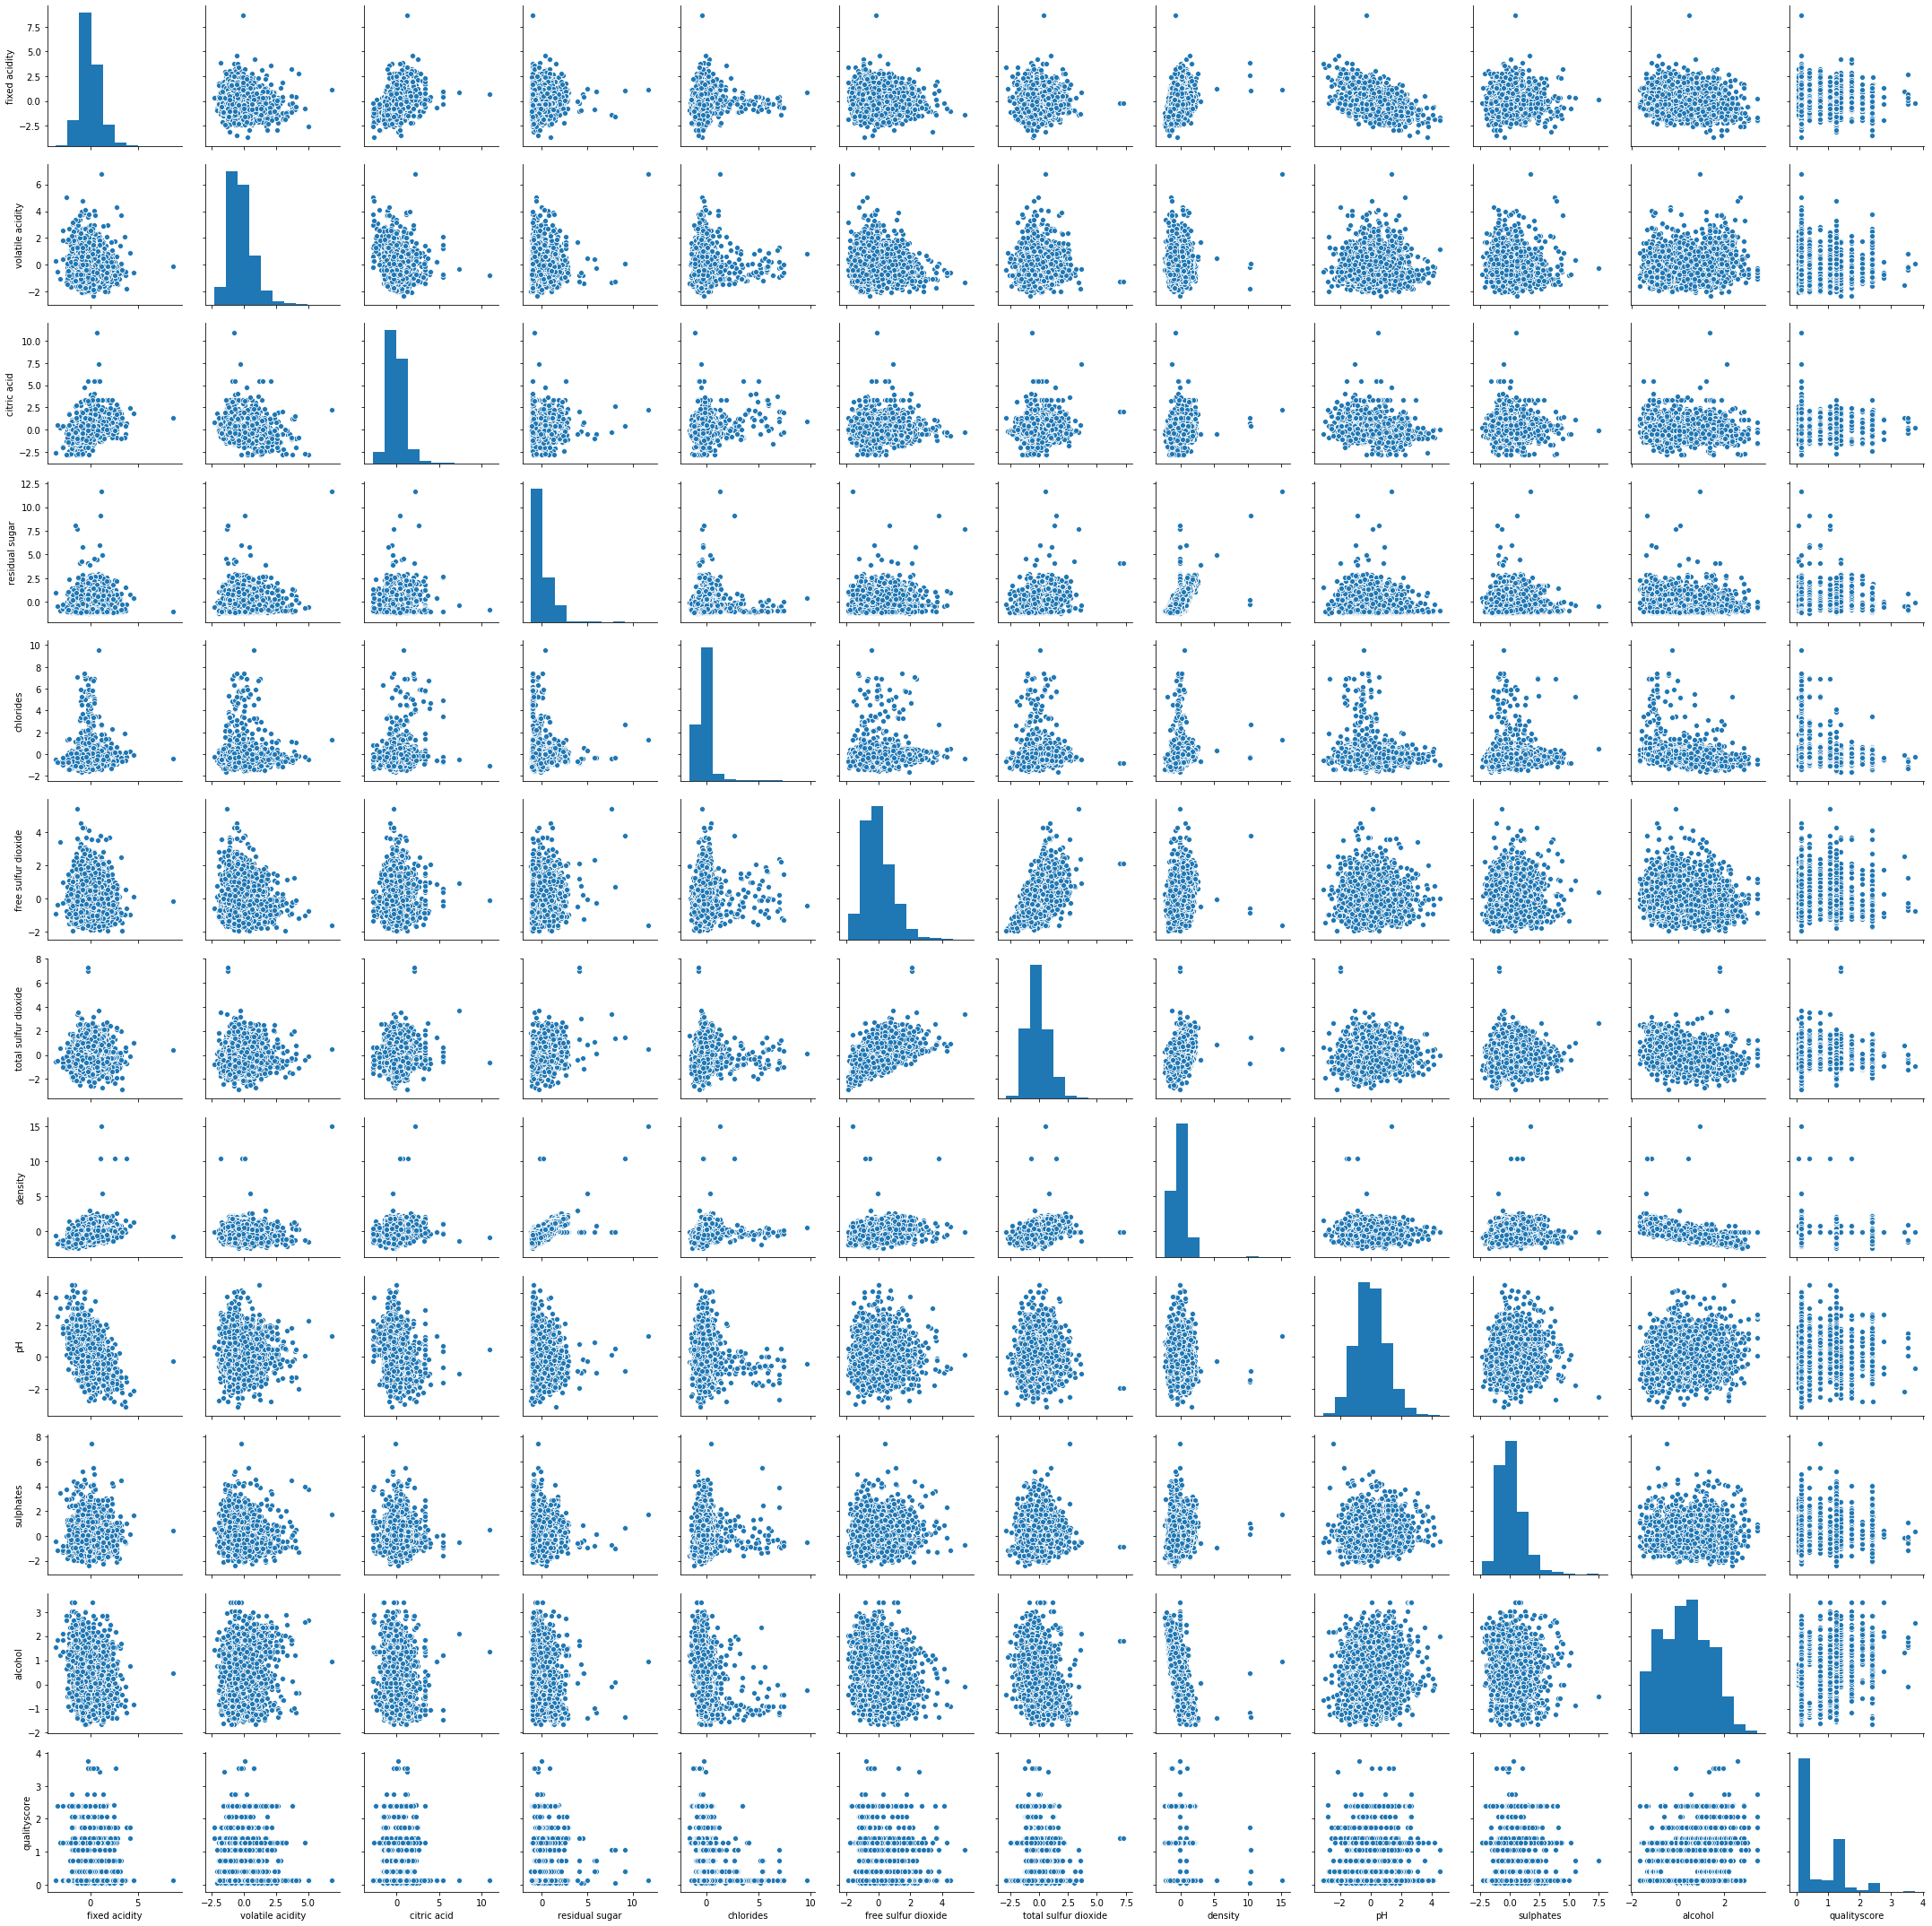

In [34]:
sns.pairplot(hogescore)

Aan de hand van de bovenstaande pairplot is te zeggen dat er

Er is tez zien dat er veel outliers voorkomt in de features.


### Model implementeren




In [35]:
data_kmeans   = hogescore #kopie van de dataset maken

In [36]:
# Functie apply_kmeans toepassen om demodel kmeans toe te paseen op vershcillende k
def applyKmeans(data, k):
    model_kmeans =KMeans()
    model_kmeans.set_params(n_clusters = k, random_state = 0)
    model_kmeans.fit(data)
    return model_kmeans

In [37]:
#bepaal de optimale k dmv elbow point method
def plotElbowpoint(K, data):
    distortions = []
    for k in K:
        model = applyKmeans(data_kmeans, k) # kmeans toepassen op data_kmeans en k
        distortions.append(model.inertia_) # voeg de som van de inertia toe
        
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions,'bx-')
    #Titel en labls aangeven
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

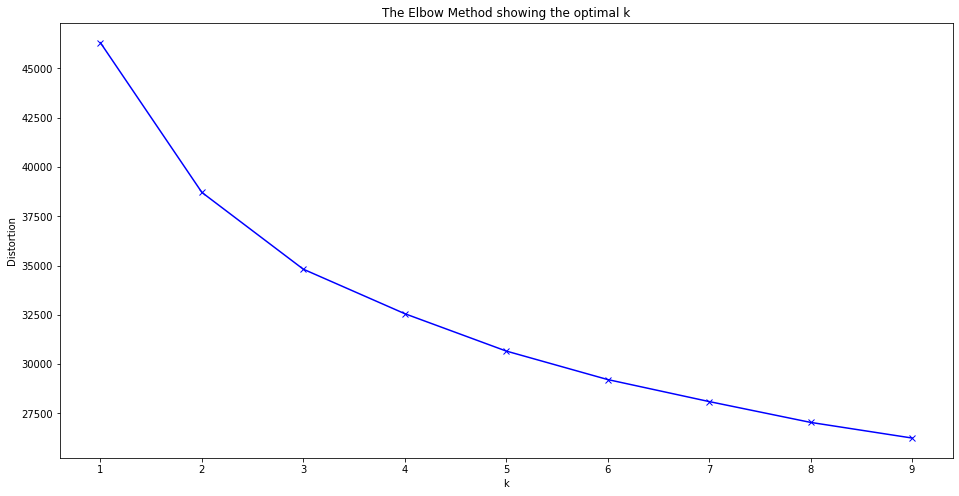

In [38]:
K = range(1,10) 
plotElbowpoint(K, data_kmeans)

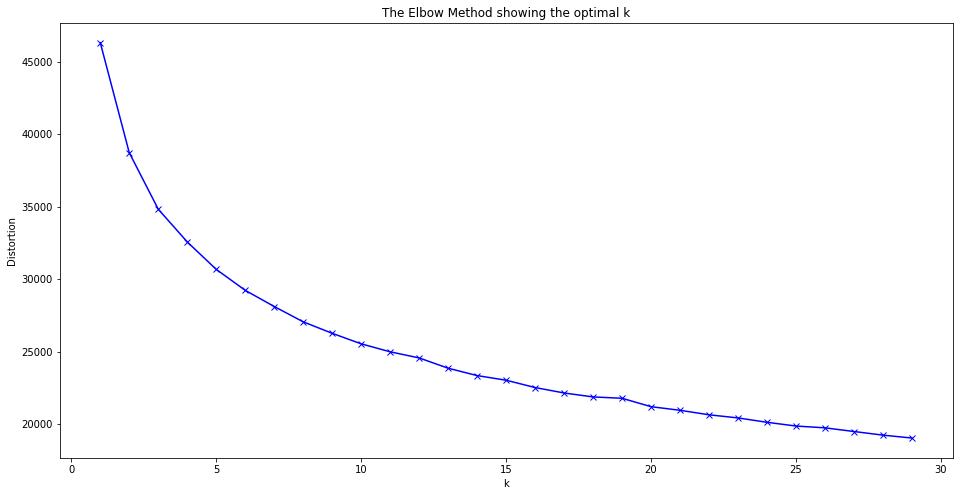

In [39]:
K = range(1,30) 
plotElbowpoint(K, data_kmeans)

Aan de hand van beiden grafiek is de knick bij k= 3 te zien.   We  kunnen de model   toepassen op k= 3.

In [40]:
#model toepassen op data_kmeansen k =  3
mod = applyKmeans(data_kmeans,  3)
prediction_kMeans = mod.fit_predict(data_kmeans)

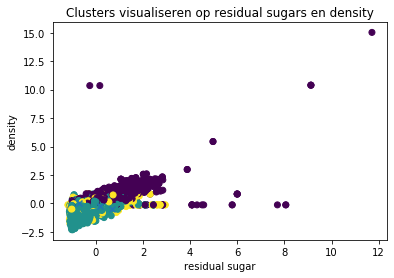

In [41]:
#de gevonden clusteres visualiseren op de features residual sugar en density
plt.scatter(data_kmeans.loc[:,'residual sugar'],data_kmeans.loc[:,'density'],marker='o', c=prediction_kMeans)
plt.scatter(mod.cluster_centers_[:,0],mod.cluster_centers_[:,1],marker='x')
#Titel en labels aangeven
plt.xlabel('residual sugar')
plt.ylabel('density')
plt.title('Clusters visualiseren op residual sugars en density')
plt.show()

In [55]:
# De gemiddelde van elke elke feature tov elke clusters aan te tonen
hogescore['kmeanlabel'] = prediction_kMeans
hogescore.groupby('kmeanlabel').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,qualityscore
kmeanlabel,,,,,,,,,,,,
0,0.191377,-0.211509,0.173705,0.896929,0.285009,0.613581,0.679897,0.844446,-0.257092,0.107786,-0.652512,0.409840
1,-0.733838,0.034682,-0.412821,-0.463510,-0.320418,-0.098865,-0.360140,-0.583455,0.765487,0.092990,0.679860,0.736552
2,0.676670,-0.491298,0.507284,-0.330776,-0.225393,-0.460189,-0.607789,-0.448315,-0.613701,0.040061,0.723883,0.735360


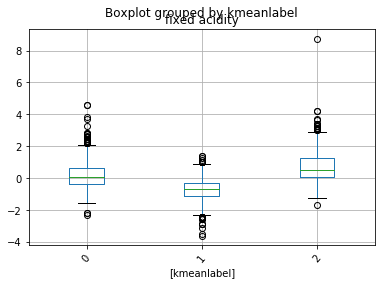

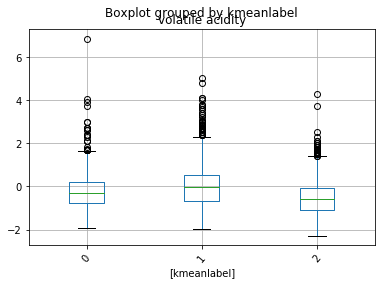

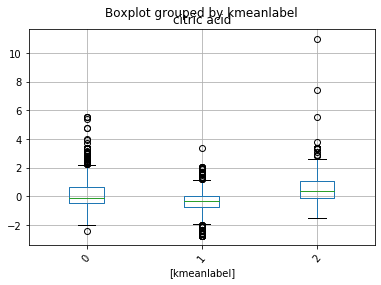

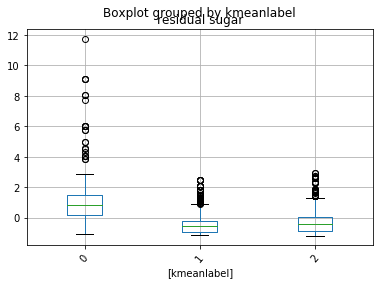

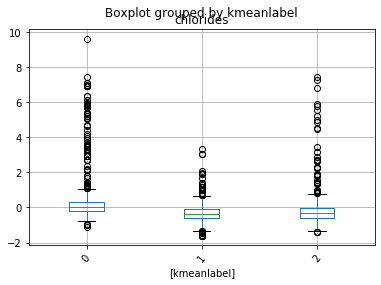

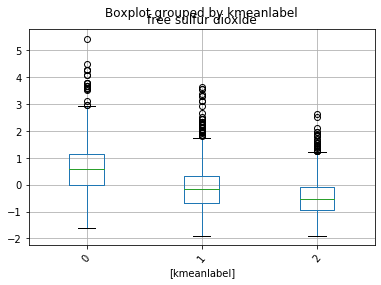

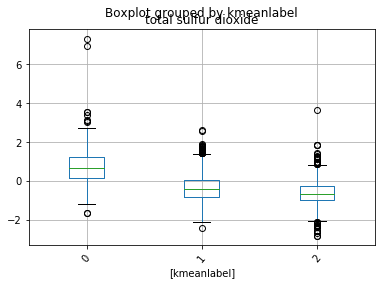

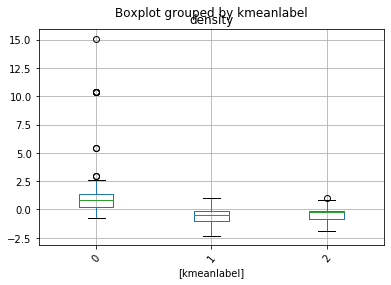

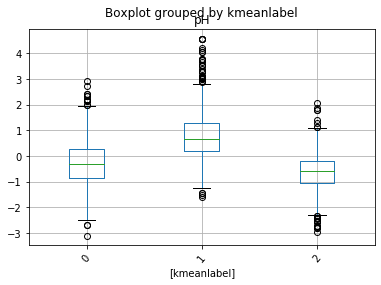

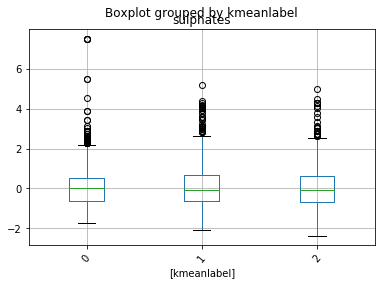

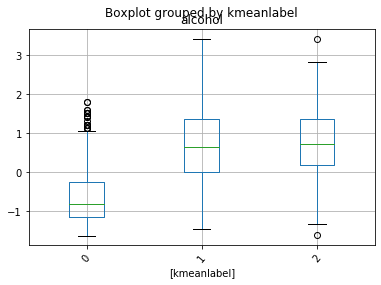

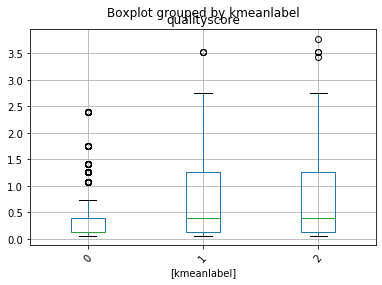

In [56]:
#Boxplotten  tekenen van de clusters tov features
col = list(hogescore.columns)
col
for i in range(len(col)-1):
    hogescore.loc[:, ['kmeanlabel',col[i]]].boxplot( by='kmeanlabel', rot = 50)

In [60]:
# Kwaliteit testen van onze model
mod.score(data_kmeans.loc[:,'fixed acidity':'qualityscore'])

-34814.68353167452

## Communication 

We  hebben aan de hand de elbow point method, onze optimale k bepaalt.
Dit blijkt namelijk 3 te zijn.
Vervolgens hebben we onze model ( *applykmeans)* toegepast op k = 3 en een kopie van de dataset hogescore (*data_kmeans*). Hier kregen we een score van -34914.68353167452.
Verder wordt de gemiddelden van elke feautures ten opzichte van elke clusters bepaald. We hebben ook de boxplotten van de clusters op elke feature gevisualiseerd.

Uit onze boxplotten en gemiddelden van de clusters kunnen we de volgende conclusies trekkenn van onze clusters:

**Cluster 0**

* clluster 1: de feature residual sugar, total sulfur dioxide,density,alcohol zijn kenmerkend voor cluster 0, want de boxplotten van deze feature voor cluster 0 overlappen helemaal niet met de boxplotten van cluster 1 en 2.

Er is dus een grote verschil tussen cluster o en de andere clusters bij deze features.
* Bij cluster 0 zijn de features  chlorides, free  sulfur dioxide ook kenmerkend , want de boxplotten van cluster 0 overlappen met de andere 2. Echter ligt de mediaan van cluster 0 buiten de de boxplotten van de andere clusters. 
Er is dus een middelmatige verschil tussen cluster 0 en de andere clusters.

De qulaityscore van cluster 0 is lager dan de andere clusters. We kunnen zeggen dat deze kenmerkende features heeft een iinvloed op de lage quality score van cluster 0.

**Cluster 1 en 2**
Uit de boxplotten kunnen we zien dat er geen grote verschil is tussen  de clusters 1 en 2, behalve bij de features fixed acidity, citric acid en de pH.

* fixed acidity: de boxplotten van cluster 1 en 2 overlappen helemaal niet, dus er is een grote verschil tussen de twee clusters.
    cluster 2 > cluster 1
* citric acidity overlappen een beetje , dus er is relatief een groot verschil.
    cluster 2 > cluster 1
* De pH van cluster 1 is hoger dan cluster 2 en 0.
Je kan dus zeggen dat de cluster 1 zuurder is dan de andere 2 clusters.






**Kunnen we verschillende groepen vinden van de wijnen met een hoge score op base van de chemische samenstelling?**
**Antwoord:** We kunnen aan de hand van de elbow point method zien dat we optimaal 3 groepen kunnen vinden van de wijnen met een hoge score op base van de chemische samenstelling.  En op basis van deze groepen kunnen we de verschillen in verband met de features.